In [272]:
import numpy as np

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [274]:
data=pd.read_csv('mydata.csv',encoding='latin-1')
data.head(n=6)

,Heat_Related_Illness,CCUpdates
0,False,{1};Chest Pain;|{2};Fatigue;
1,False,{1};left 5th finger dislocation;
2,False,{1};NAUSEA CHEST PRESSURE HEADACHE;
3,False,{1};pt. reports I have another bowel blockage....
4,False,{1};;|{2};Dizziness;
5,False,{1};;


In [275]:
data['Heat_Related_Illness']=data['Heat_Related_Illness']*1

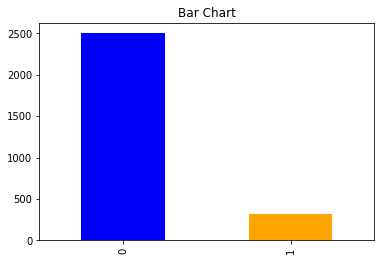

In [248]:
count_Class=pd.value_counts(data["Heat_Related_Illness"],sort=True)
count_Class.plot(kind='bar',color=["blue","orange"])
plt.title("Bar Chart")
plt.show()

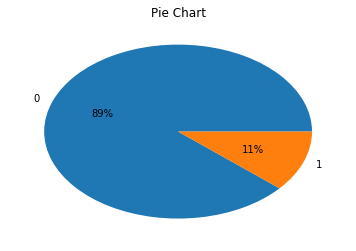

In [249]:
count_Class.plot(kind='pie',autopct='%1.0f%%')
plt.title('Pie Chart')
plt.ylabel('')
plt.show()

In [280]:
count1=Counter("".join(data[data['Heat_Related_Illness']==0]["CCUpdates"]).split()).most_common(20)
df1=pd.DataFrame.from_dict(count1)
df1=df1.rename(columns={0: "False", 1: "count"})
count2=Counter("".join(data[data['Heat_Related_Illness']==1]['CCUpdates']).split()).most_common(20)
df2=pd.DataFrame.from_dict(count2)
df2=df2.rename(columns={0: "True", 1: "count"})

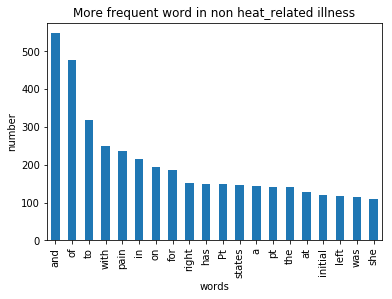

In [281]:
df1.plot.bar(legend=False)
y_pos=np.arange(len(df1["False"]))
plt.xticks(y_pos,df1["False"])
plt.title("More frequent word in non heat_related illness")
plt.xlabel('words')
plt.ylabel('number')
plt.show()

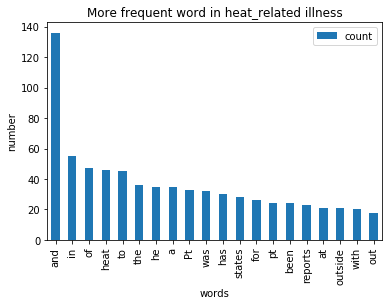

In [282]:
df2.plot.bar(legend=True)
y_pos=np.arange(len(df2["True"]))
plt.xticks(y_pos,df2["True"])
plt.title("More frequent word in heat_related illness")
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [287]:
f=feature_extraction.text.CountVectorizer('english')
X=f.fit_transform(data['CCUpdates'])
#np.shape(X)

In [288]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,data['Heat_Related_Illness'],test_size=0.33,random_state=714)
#print([np.shape(y_train),np.shape(y_test)])

In [289]:
list_alpha=np.arange(1/100000,20,0.11)

In [290]:
score_train=np.zeros(len(list_alpha))
score_test=np.zeros(len(list_alpha))
recall_test=np.zeros(len(list_alpha))
precision_test=np.zeros(len(list_alpha))
count=0
for alpha in list_alpha:
    bayes=naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train,y_train)
    score_train[count]=bayes.score(X_train,y_train)
    score_test[count]=bayes.score(X_test,y_test)
    recall_test[count]=metrics.recall_score(y_test,bayes.predict(X_test))
    precision_test[count]=metrics.precision_score(y_test,bayes.predict(X_test))
    count=count+1

In [291]:
matrix=np.matrix(np.c_[list_alpha,score_train,score_test,recall_test,precision_test])
models=pd.DataFrame(data=matrix,columns=
                   ['alpha','Train Accuracy','Test Accuracy','Test Sensitivity','Test Precision'])
#models.head(n=4)

In [292]:
best_index = models['Test Sensitivity'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha               0.220010
Train Accuracy      0.965042
Test Accuracy       0.909774
Test Sensitivity    0.780000
Test Precision      0.557143
Name: 2, dtype: float64

In [293]:
m_confusion_test=metrics.confusion_matrix(y_test,bayes.predict(X_test))
pd.DataFrame(data=m_confusion_test,columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])

,Predicted 0,Predicted 1
Actual 0,769,62
Actual 1,22,78


In [295]:
list_C = np.arange(500, 2000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [296]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Sensitivity', 'Test Precision'])
models.head(n=4)

,C,Train Accuracy,Test Accuracy,Test Sensitivity,Test Precision
0,500.0,0.966102,0.957035,0.62,0.968750
1,600.0,0.967691,0.953813,0.61,0.938462
2,700.0,0.969280,0.951665,0.60,0.923077
3,800.0,0.969809,0.947368,0.60,0.869565


In [297]:
best_index = models['Test Sensitivity'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                   500.000000
Train Accuracy        0.966102
Test Accuracy         0.957035
Test Sensitivity      0.620000
Test Precision        0.968750
Name: 0, dtype: float64

In [298]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,829,2
Actual 1,38,62
